In [1]:
import pandas as pd
import datetime
import json
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras import layers
from matplotlib.image import imread
from keras.preprocessing import image
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical




Using TensorFlow backend.


### Pulling stock list from Virtus LifeSci Biotech ETF

In [0]:
stocks = ['ITCI', 'AXSM', 'CVM', 'KRTX', 'APLS', 'PRVB', 'CRTX', 'EPZM',
       'CRBP', 'CCXI', 'TGTX', 'IMGN', 'FATE', 'AKBA', 'DNLI', 'RIGL', 
       'PRNB', 'ARVN', 'ZYME', 'MRNA', 'CYTK', 'FTSV', 'ASND',
       'XBIT', 'ALEC', 'ORTX', 'ADVM', 'MGNX', 'AKRO', 'ESPR', 'BHVN',
       'YMAB', 'RGNX', 'MYOK', 'TPTX', 'ATNX', 'BLUE', 'AGEN', 'AVRO',
       'DCPH', 'CTMX', 'SRNE', 'ARDX', 'BCRX', 'RETA', 'KOD', 'DTIL',
       'RARX', 'AUTL', 'GTHX', 'CARA', 'KDMN', 'XNCR', 'ACHN', 'ARNA',
       'RCKT', 'TBIO', 'VYGR', 'SGMO', 'ODT', 'ANAB', 'ATRA', 'CNST',
       'GERN', 'BPMC', 'ALLO', 'BBIO', 'FGEN', 'PGNX', 'MGTX', 'NXTC',
       'IMMU', 'ZIOP', 'CRSP', 'IOVA', 'VKTX', 'EIDX', 'MYOV', 'AMRS',
       'KRYS', 'KURA', 'MDGL', 'UBX', 'TCDA', 'QURE', 'MRTX', 'ASMB',
       'GLYC', 'RYTM', 'FIXX', 'DRNA', 'ARWR', 'ALLK', 'GOSS', 'WVE']

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Creating dictionary and JSON

In [0]:
with open('/content/drive/My Drive/capstone_stock/1_31_2020_pull.json', 'r') as file:
    data = json.load(file)

### Creating the Target

In [0]:
#Next Day Max/Min Value (% Difference from Closing Price)¶
start = datetime.datetime.now()
period = [1, 2]
for stock in stocks:
    
    stock_dict_list = data[stock]
    num_days = len(stock_dict_list)
    for index, dict_ in enumerate(stock_dict_list):
        _open = dict_['Open']
        if index+period[1] >= num_days:
            _low = None
            _max = None
        else:
            _low = np.min([dict_['Low'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
            _max = np.max([dict_['High'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
        stock_dict_list[index]['Low_1'] = _low
        stock_dict_list[index]['Max_1'] = _max
    data[stock] = stock_dict_list

# # 3 Day Max/Min Value (% Difference from Closing Price)
# # The range is from the 2nd day to the 3rd after the input day
# start = datetime.datetime.now()
# period = [2, 4]
# for stock in stocks:
    
#     stock_dict_list = data[stock]
#     num_days = len(stock_dict_list)
#     for index, dict_ in enumerate(stock_dict_list):
#         _open = dict_['Open']
#         if index+period[1] >= num_days:
#             _low = None
#             _max = None
#         else:
#             _low = np.min([dict_['Low'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
#             _max = np.max([dict_['High'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
#         stock_dict_list[index]['Low_3'] = _low
#         stock_dict_list[index]['Max_3'] = _max
#     data[stock] = stock_dict_list

# # 10 Day Max/Min Value (% Difference from Closing Price)
# # The range is from the 4th day to the 10th after the input day

# start = datetime.datetime.now()
# period = [4, 11]
# for stock in stocks:
    
#     stock_dict_list = data[stock]
#     num_days = len(stock_dict_list)
#     for index, dict_ in enumerate(stock_dict_list):
#         _open = dict_['Open']
#         if index+period[1] >= num_days:
#             _low = None
#             _max = None
#         else:
#             _low = np.min([dict_['Low'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
#             _max = np.max([dict_['High'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
#         stock_dict_list[index]['Low_10'] = _low
#         stock_dict_list[index]['Max_10'] = _max
#     data[stock] = stock_dict_list

# # 30 Day Max/Min Value (% Difference from Closing Price)
# # The range is from the 11th day to the 30th after the input day
# start = datetime.datetime.now()
# period = [11, 31]
# for stock in stocks:
    
#     stock_dict_list = data[stock]
#     num_days = len(stock_dict_list)
#     for index, dict_ in enumerate(stock_dict_list):
#         _open = dict_['Open']
#         if index+period[1] >= num_days:
#             _low = None
#             _max = None
#         else:
#             _low = np.min([dict_['Low'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
#             _max = np.max([dict_['High'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
#         stock_dict_list[index]['Low_30'] = _low
#         stock_dict_list[index]['Max_30'] = _max
#     data[stock] = stock_dict_list

#### Scaling Input

In [0]:
for stock in stocks:
  df = pd.DataFrame(data[stock])
  max_value = df[['High', 'Low', 'Open', 'Close', 'Adj Close']].max()
  df[['High', 'Low', 'Open', 'Close', 'Adj Close']] = df[['High', 'Low', 'Open', 'Close', 'Adj Close']]/max_value
  df['Volume'] = df['Volume']/ df['Volume'].max()
  df= df.dropna()
  data[stock] = df.to_dict('records')

In [0]:
period = 60 # days of trading
for stock in stocks:
    
    stock_dict_list = data[stock]
    for index, dict_ in enumerate(stock_dict_list): 
        if index-period < 0:
            empty_array = None
            
        else:
            high = [dict_['High'] for dict_ in stock_dict_list[index-period:index]]
            low = [dict_['Low'] for dict_ in stock_dict_list[index-period:index]]
            volume = [dict_['Volume'] for dict_ in stock_dict_list[index-period:index]]
            open_ = [dict_['Open'] for dict_ in stock_dict_list[index-period:index]]
            ad_close = [dict_['Adj Close'] for dict_ in stock_dict_list[index-period:index]]
            close = [dict_['Close'] for dict_ in stock_dict_list[index-period:index]]
            high_change = [dict_['Max_1'] for dict_ in stock_dict_list[index-period:index]]
            low_change = [dict_['Low_1'] for dict_ in stock_dict_list[index-period:index]]
            empty_array = [high, low, open_, close, ad_close, volume, high_change, low_change]
            empty_array = np.array(empty_array).reshape(60,8)
        stock_dict_list[index]['Target'] = empty_array
    
    data[stock] = stock_dict_list
        
for stock in stocks:
    df = pd.DataFrame(data[stock])
    df= df.dropna()
    data[stock] = df.to_dict('records')  

In [0]:
data_list = []

for stock in stocks:
    for dict_ in data[stock]:
        list_ = [0, 0, 0, 0, 0, 0, 0]
        if dict_['Low_1'] <= -0.10:
            list_[0] = 1      
        else:
            if dict_['Low_1'] <= -0.075:
                list_[1] = 1
            else:
                if dict_['Low_1'] <= -0.05:
                    list_[2] = 1
                else:
                    if dict_['Low_1'] <= -0.025:
                        list_[3] = 1
                    else:
                        if dict_['Low_1'] <= -0.01:
                            list_[4] = 1
                        else:
                            if dict_['Low_1'] < 0:
                                list_[5] = 1
                            else:
                                list_[6] = 1

        dict_['Low_1'] =list_

        data_list.append(dict_)

In [13]:
seq_length = 60

model = models.Sequential()
model.add(layers.Conv1D(128, 3, activation='relu',  input_shape=(60, 8)))
model.add(layers.AveragePooling1D(3))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(128, 3, activation='relu'))
model.add(layers.AveragePooling1D(3))
model.add(layers.Dropout(0.2
                         
                         
                         
                         
                         
                         
                         
                         
                         
                         
                         
                         
                         
                         ))
model.add(layers.GRU(50, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.GRU(100, return_sequences=False))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(7, activation = "softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 58, 128)           3200      
_________________________________________________________________
average_pooling1d_3 (Average (None, 19, 128)           0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 19, 128)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 17, 128)           49280     
_________________________________________________________________
average_pooling1d_4 (Average (None, 5, 128)            0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 128)            0         
_________________________________________________________________
gru_3 (GRU)                  (None, 5, 50)            

In [12]:
np.shape(y)

(142399, 7)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 113919 samples, validate on 28480 samples
Epoch 1/10





113919/113919 [==============================] - 26s 226us/step - loss: 1.8102 - acc: 0.2671 - val_loss: 1.8010 - val_acc: 0.2661
Epoch 2/10
113919/113919 [==============================] - 23s 198us/step - loss: 1.7958 - acc: 0.2694 - val_loss: 1.7935 - val_acc: 0.2700
Epoch 3/10
113919/113919 [==============================] - 23s 200us/step - loss: 1.7867 - acc: 0.2728 - val_loss: 1.7858 - val_acc: 0.2700
Epoch 4/10
113919/113919 [==============================] - 23s 199us/step - loss: 1.7823 - acc: 0.2729 - val_loss: 1.7825 - val_acc: 0.2680
Epoch 5/10
113919/113919 [==============================] - 23s 200us/step - loss: 1.7784 - acc: 0.2743 - val_loss: 1.7780 - val_acc: 0.2738
Epoch 6/10
113919/113919 [==============================] - 23s 201us/step - loss: 1.7753 - acc: 0.2802 - val_loss: 1.7738 - val_acc: 0.2855
E

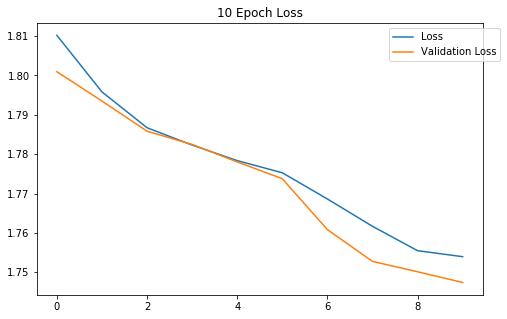

Train on 113919 samples, validate on 28480 samples
Epoch 1/10
113919/113919 [==============================] - 23s 201us/step - loss: 1.7511 - acc: 0.3058 - val_loss: 1.7466 - val_acc: 0.3064
Epoch 2/10
113919/113919 [==============================] - 23s 198us/step - loss: 1.7489 - acc: 0.3066 - val_loss: 1.7424 - val_acc: 0.3088
Epoch 3/10
113919/113919 [==============================] - 23s 198us/step - loss: 1.7484 - acc: 0.3068 - val_loss: 1.7477 - val_acc: 0.3044
Epoch 4/10
113919/113919 [==============================] - 23s 199us/step - loss: 1.7463 - acc: 0.3076 - val_loss: 1.7417 - val_acc: 0.3090
Epoch 5/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7447 - acc: 0.3095 - val_loss: 1.7421 - val_acc: 0.3092
Epoch 6/10
113919/113919 [==============================] - 23s 199us/step - loss: 1.7450 - acc: 0.3085 - val_loss: 1.7434 - val_acc: 0.3083
Epoch 7/10
113919/113919 [==============================] - 23s 201us/step - loss: 1.7438 - acc: 0.3092

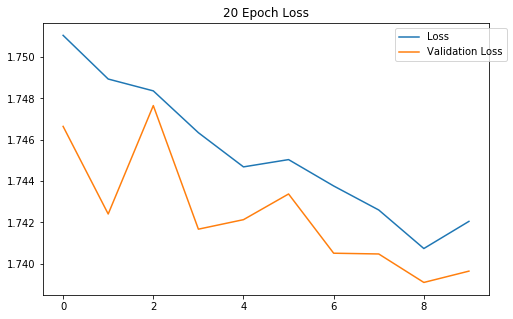

Train on 113919 samples, validate on 28480 samples
Epoch 1/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7409 - acc: 0.3112 - val_loss: 1.7429 - val_acc: 0.3060
Epoch 2/10
113919/113919 [==============================] - 23s 199us/step - loss: 1.7395 - acc: 0.3117 - val_loss: 1.7400 - val_acc: 0.3072
Epoch 3/10
113919/113919 [==============================] - 23s 198us/step - loss: 1.7382 - acc: 0.3107 - val_loss: 1.7396 - val_acc: 0.3112
Epoch 4/10
113919/113919 [==============================] - 23s 198us/step - loss: 1.7392 - acc: 0.3101 - val_loss: 1.7398 - val_acc: 0.3112
Epoch 5/10
113919/113919 [==============================] - 23s 198us/step - loss: 1.7384 - acc: 0.3111 - val_loss: 1.7390 - val_acc: 0.3097
Epoch 6/10
113919/113919 [==============================] - 23s 199us/step - loss: 1.7382 - acc: 0.3119 - val_loss: 1.7377 - val_acc: 0.3114
Epoch 7/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7379 - acc: 0.3105

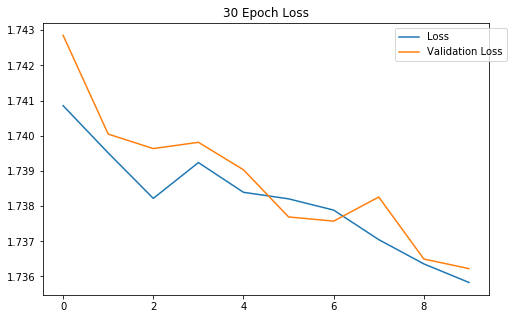

Train on 113919 samples, validate on 28480 samples
Epoch 1/10
113919/113919 [==============================] - 23s 198us/step - loss: 1.7358 - acc: 0.3142 - val_loss: 1.7365 - val_acc: 0.3098
Epoch 2/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7349 - acc: 0.3130 - val_loss: 1.7364 - val_acc: 0.3103
Epoch 3/10
113919/113919 [==============================] - 22s 196us/step - loss: 1.7343 - acc: 0.3140 - val_loss: 1.7391 - val_acc: 0.3061
Epoch 4/10
113919/113919 [==============================] - 23s 198us/step - loss: 1.7346 - acc: 0.3134 - val_loss: 1.7359 - val_acc: 0.3103
Epoch 5/10
113919/113919 [==============================] - 23s 199us/step - loss: 1.7338 - acc: 0.3134 - val_loss: 1.7363 - val_acc: 0.3104
Epoch 6/10
113919/113919 [==============================] - 22s 196us/step - loss: 1.7342 - acc: 0.3127 - val_loss: 1.7347 - val_acc: 0.3122
Epoch 7/10
113919/113919 [==============================] - 23s 198us/step - loss: 1.7340 - acc: 0.3118

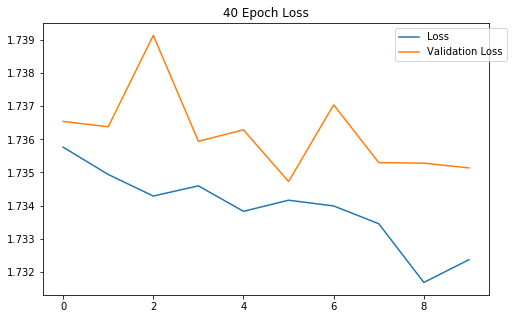

Train on 113919 samples, validate on 28480 samples
Epoch 1/10
113919/113919 [==============================] - 22s 196us/step - loss: 1.7318 - acc: 0.3147 - val_loss: 1.7338 - val_acc: 0.3113
Epoch 2/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7318 - acc: 0.3149 - val_loss: 1.7332 - val_acc: 0.3131
Epoch 3/10
113919/113919 [==============================] - 23s 199us/step - loss: 1.7320 - acc: 0.3159 - val_loss: 1.7349 - val_acc: 0.3121
Epoch 4/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7313 - acc: 0.3159 - val_loss: 1.7328 - val_acc: 0.3117
Epoch 5/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7322 - acc: 0.3151 - val_loss: 1.7350 - val_acc: 0.3119
Epoch 6/10
113919/113919 [==============================] - 23s 199us/step - loss: 1.7311 - acc: 0.3147 - val_loss: 1.7324 - val_acc: 0.3129
Epoch 7/10
113919/113919 [==============================] - 22s 196us/step - loss: 1.7308 - acc: 0.3151

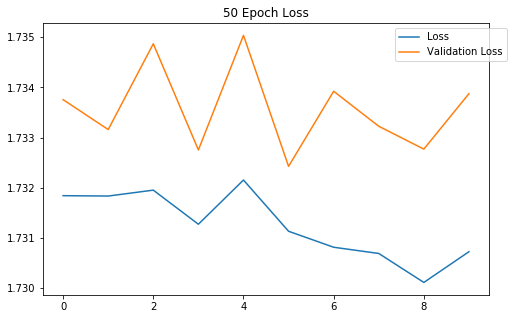

Train on 113919 samples, validate on 28480 samples
Epoch 1/10
113919/113919 [==============================] - 23s 201us/step - loss: 1.7304 - acc: 0.3162 - val_loss: 1.7361 - val_acc: 0.3118
Epoch 2/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7287 - acc: 0.3154 - val_loss: 1.7313 - val_acc: 0.3124
Epoch 3/10
113919/113919 [==============================] - 23s 198us/step - loss: 1.7300 - acc: 0.3149 - val_loss: 1.7339 - val_acc: 0.3117
Epoch 4/10
113919/113919 [==============================] - 23s 198us/step - loss: 1.7300 - acc: 0.3158 - val_loss: 1.7337 - val_acc: 0.3116
Epoch 5/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7290 - acc: 0.3159 - val_loss: 1.7335 - val_acc: 0.3122
Epoch 6/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7297 - acc: 0.3149 - val_loss: 1.7332 - val_acc: 0.3113
Epoch 7/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7297 - acc: 0.3158

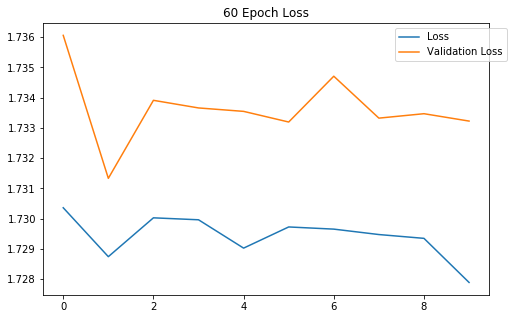

Train on 113919 samples, validate on 28480 samples
Epoch 1/10
113919/113919 [==============================] - 22s 196us/step - loss: 1.7286 - acc: 0.3157 - val_loss: 1.7351 - val_acc: 0.3095
Epoch 2/10
113919/113919 [==============================] - 23s 202us/step - loss: 1.7288 - acc: 0.3159 - val_loss: 1.7356 - val_acc: 0.3124
Epoch 3/10
113919/113919 [==============================] - 23s 199us/step - loss: 1.7280 - acc: 0.3158 - val_loss: 1.7345 - val_acc: 0.3106
Epoch 4/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7276 - acc: 0.3168 - val_loss: 1.7319 - val_acc: 0.3132
Epoch 5/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7280 - acc: 0.3164 - val_loss: 1.7340 - val_acc: 0.3124
Epoch 6/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7274 - acc: 0.3175 - val_loss: 1.7320 - val_acc: 0.3116
Epoch 7/10
113919/113919 [==============================] - 23s 198us/step - loss: 1.7268 - acc: 0.3169

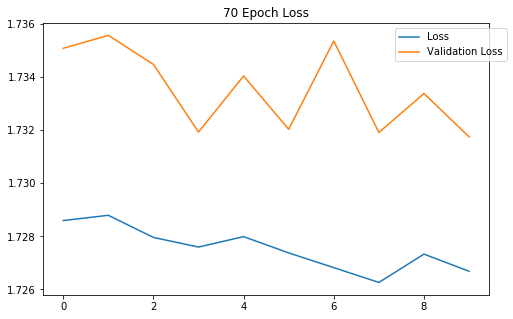

Train on 113919 samples, validate on 28480 samples
Epoch 1/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7270 - acc: 0.3163 - val_loss: 1.7309 - val_acc: 0.3129
Epoch 2/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7274 - acc: 0.3167 - val_loss: 1.7336 - val_acc: 0.3098
Epoch 3/10
113919/113919 [==============================] - 23s 201us/step - loss: 1.7257 - acc: 0.3170 - val_loss: 1.7325 - val_acc: 0.3140
Epoch 4/10
113919/113919 [==============================] - 23s 198us/step - loss: 1.7260 - acc: 0.3168 - val_loss: 1.7322 - val_acc: 0.3128
Epoch 5/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7252 - acc: 0.3162 - val_loss: 1.7341 - val_acc: 0.3117
Epoch 6/10
113919/113919 [==============================] - 22s 196us/step - loss: 1.7268 - acc: 0.3175 - val_loss: 1.7319 - val_acc: 0.3138
Epoch 7/10
113919/113919 [==============================] - 22s 195us/step - loss: 1.7252 - acc: 0.3179

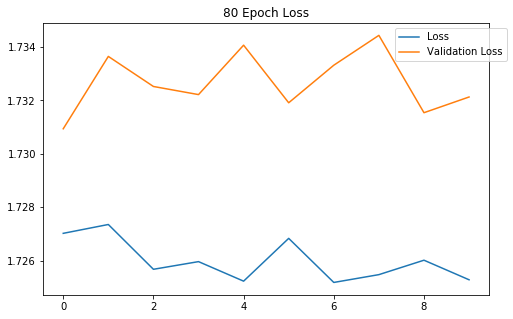

Train on 113919 samples, validate on 28480 samples
Epoch 1/10
113919/113919 [==============================] - 23s 198us/step - loss: 1.7252 - acc: 0.3184 - val_loss: 1.7320 - val_acc: 0.3150
Epoch 2/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7256 - acc: 0.3160 - val_loss: 1.7343 - val_acc: 0.3137
Epoch 3/10
113919/113919 [==============================] - 23s 198us/step - loss: 1.7258 - acc: 0.3174 - val_loss: 1.7313 - val_acc: 0.3136
Epoch 4/10
113919/113919 [==============================] - 22s 196us/step - loss: 1.7249 - acc: 0.3174 - val_loss: 1.7315 - val_acc: 0.3152
Epoch 5/10
113919/113919 [==============================] - 23s 199us/step - loss: 1.7253 - acc: 0.3182 - val_loss: 1.7329 - val_acc: 0.3133
Epoch 6/10
113919/113919 [==============================] - 23s 198us/step - loss: 1.7254 - acc: 0.3176 - val_loss: 1.7325 - val_acc: 0.3128
Epoch 7/10
113919/113919 [==============================] - 22s 196us/step - loss: 1.7254 - acc: 0.3176

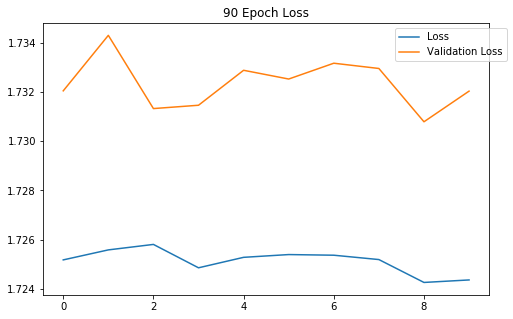

Train on 113919 samples, validate on 28480 samples
Epoch 1/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7243 - acc: 0.3170 - val_loss: 1.7314 - val_acc: 0.3149
Epoch 2/10
113919/113919 [==============================] - 23s 199us/step - loss: 1.7259 - acc: 0.3165 - val_loss: 1.7323 - val_acc: 0.3136
Epoch 3/10
113919/113919 [==============================] - 22s 195us/step - loss: 1.7236 - acc: 0.3186 - val_loss: 1.7323 - val_acc: 0.3138
Epoch 4/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7241 - acc: 0.3178 - val_loss: 1.7332 - val_acc: 0.3130
Epoch 5/10
113919/113919 [==============================] - 22s 196us/step - loss: 1.7231 - acc: 0.3172 - val_loss: 1.7330 - val_acc: 0.3135
Epoch 6/10
113919/113919 [==============================] - 23s 199us/step - loss: 1.7233 - acc: 0.3188 - val_loss: 1.7320 - val_acc: 0.3126
Epoch 7/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7239 - acc: 0.3193

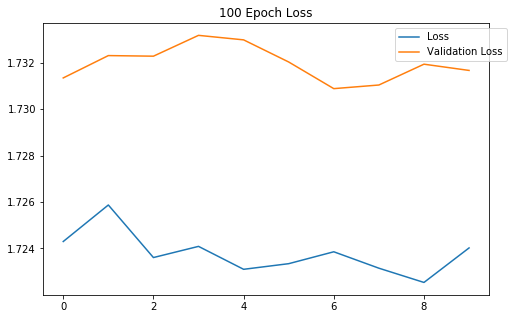

Train on 113919 samples, validate on 28480 samples
Epoch 1/10
113919/113919 [==============================] - 22s 196us/step - loss: 1.7237 - acc: 0.3177 - val_loss: 1.7308 - val_acc: 0.3137
Epoch 2/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7227 - acc: 0.3202 - val_loss: 1.7312 - val_acc: 0.3134
Epoch 3/10
113919/113919 [==============================] - 23s 199us/step - loss: 1.7222 - acc: 0.3202 - val_loss: 1.7331 - val_acc: 0.3117
Epoch 4/10
113919/113919 [==============================] - 22s 195us/step - loss: 1.7226 - acc: 0.3194 - val_loss: 1.7322 - val_acc: 0.3149
Epoch 5/10
113919/113919 [==============================] - 23s 198us/step - loss: 1.7229 - acc: 0.3190 - val_loss: 1.7315 - val_acc: 0.3125
Epoch 6/10
113919/113919 [==============================] - 23s 199us/step - loss: 1.7233 - acc: 0.3189 - val_loss: 1.7311 - val_acc: 0.3116
Epoch 7/10
113919/113919 [==============================] - 23s 198us/step - loss: 1.7219 - acc: 0.3188

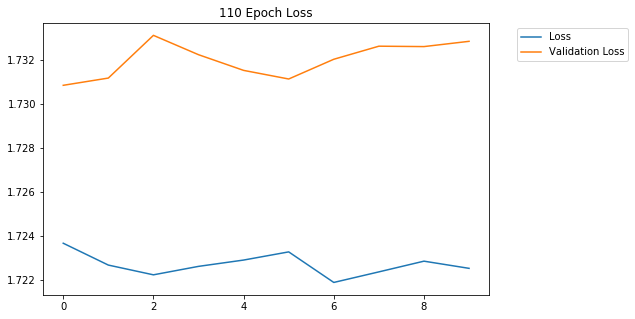

Train on 113919 samples, validate on 28480 samples
Epoch 1/10
113919/113919 [==============================] - 23s 199us/step - loss: 1.7215 - acc: 0.3204 - val_loss: 1.7305 - val_acc: 0.3142
Epoch 2/10
113919/113919 [==============================] - 22s 196us/step - loss: 1.7222 - acc: 0.3189 - val_loss: 1.7314 - val_acc: 0.3111
Epoch 3/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7228 - acc: 0.3177 - val_loss: 1.7318 - val_acc: 0.3144
Epoch 4/10
113919/113919 [==============================] - 23s 198us/step - loss: 1.7221 - acc: 0.3192 - val_loss: 1.7322 - val_acc: 0.3144
Epoch 5/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7214 - acc: 0.3184 - val_loss: 1.7316 - val_acc: 0.3142
Epoch 6/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7219 - acc: 0.3185 - val_loss: 1.7324 - val_acc: 0.3142
Epoch 7/10
113919/113919 [==============================] - 22s 196us/step - loss: 1.7214 - acc: 0.3207

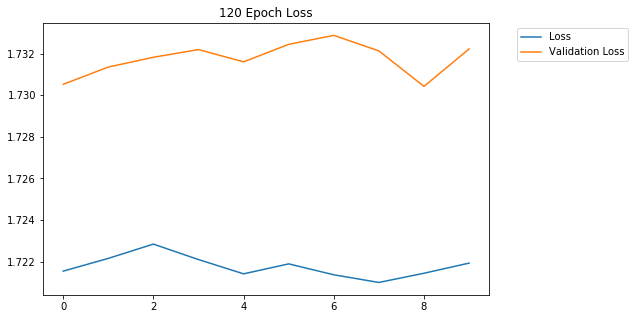

Train on 113919 samples, validate on 28480 samples
Epoch 1/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7213 - acc: 0.3200 - val_loss: 1.7326 - val_acc: 0.3112
Epoch 2/10
113919/113919 [==============================] - 22s 196us/step - loss: 1.7206 - acc: 0.3187 - val_loss: 1.7309 - val_acc: 0.3137
Epoch 3/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7207 - acc: 0.3203 - val_loss: 1.7299 - val_acc: 0.3136
Epoch 4/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7221 - acc: 0.3186 - val_loss: 1.7322 - val_acc: 0.3114
Epoch 5/10
113919/113919 [==============================] - 23s 198us/step - loss: 1.7219 - acc: 0.3197 - val_loss: 1.7303 - val_acc: 0.3131
Epoch 6/10
113919/113919 [==============================] - 23s 198us/step - loss: 1.7207 - acc: 0.3189 - val_loss: 1.7313 - val_acc: 0.3121
Epoch 7/10
113919/113919 [==============================] - 22s 196us/step - loss: 1.7214 - acc: 0.3190

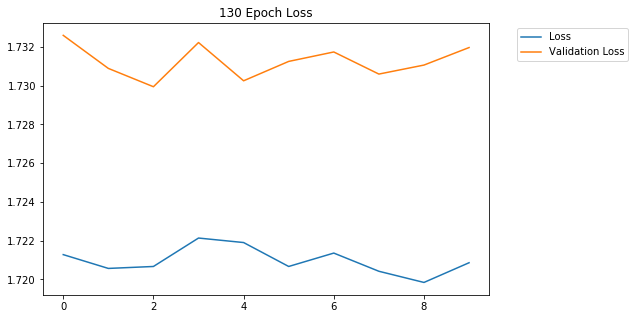

Train on 113919 samples, validate on 28480 samples
Epoch 1/10
113919/113919 [==============================] - 23s 198us/step - loss: 1.7210 - acc: 0.3200 - val_loss: 1.7318 - val_acc: 0.3118
Epoch 2/10
113919/113919 [==============================] - 22s 196us/step - loss: 1.7206 - acc: 0.3199 - val_loss: 1.7327 - val_acc: 0.3126
Epoch 3/10
113919/113919 [==============================] - 22s 195us/step - loss: 1.7203 - acc: 0.3206 - val_loss: 1.7310 - val_acc: 0.3129
Epoch 4/10
113919/113919 [==============================] - 22s 196us/step - loss: 1.7200 - acc: 0.3185 - val_loss: 1.7306 - val_acc: 0.3119
Epoch 5/10
113919/113919 [==============================] - 23s 198us/step - loss: 1.7197 - acc: 0.3202 - val_loss: 1.7303 - val_acc: 0.3133
Epoch 6/10
113919/113919 [==============================] - 22s 196us/step - loss: 1.7203 - acc: 0.3195 - val_loss: 1.7319 - val_acc: 0.3143
Epoch 7/10
113919/113919 [==============================] - 22s 192us/step - loss: 1.7193 - acc: 0.3214

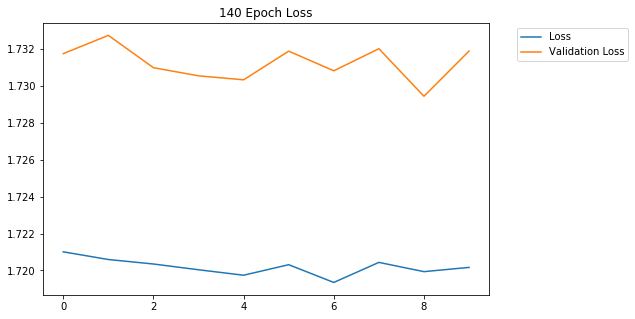

Train on 113919 samples, validate on 28480 samples
Epoch 1/10
113919/113919 [==============================] - 23s 198us/step - loss: 1.7197 - acc: 0.3199 - val_loss: 1.7301 - val_acc: 0.3129
Epoch 2/10
113919/113919 [==============================] - 22s 196us/step - loss: 1.7195 - acc: 0.3207 - val_loss: 1.7316 - val_acc: 0.3147
Epoch 3/10
113919/113919 [==============================] - 23s 199us/step - loss: 1.7205 - acc: 0.3210 - val_loss: 1.7305 - val_acc: 0.3154
Epoch 4/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7195 - acc: 0.3208 - val_loss: 1.7321 - val_acc: 0.3147
Epoch 5/10
113919/113919 [==============================] - 22s 196us/step - loss: 1.7187 - acc: 0.3201 - val_loss: 1.7328 - val_acc: 0.3137
Epoch 6/10
113919/113919 [==============================] - 23s 198us/step - loss: 1.7200 - acc: 0.3203 - val_loss: 1.7319 - val_acc: 0.3133
Epoch 7/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7201 - acc: 0.3196

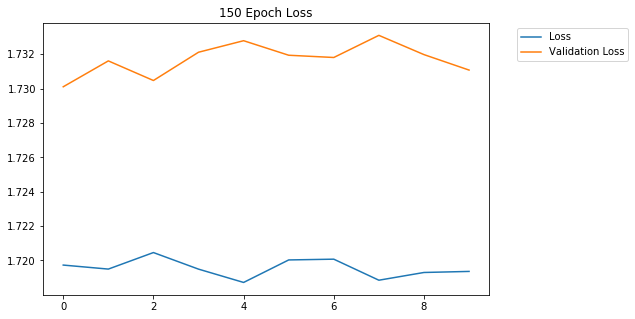

Train on 113919 samples, validate on 28480 samples
Epoch 1/10
113919/113919 [==============================] - 23s 198us/step - loss: 1.7195 - acc: 0.3209 - val_loss: 1.7327 - val_acc: 0.3139
Epoch 2/10
113919/113919 [==============================] - 22s 196us/step - loss: 1.7182 - acc: 0.3221 - val_loss: 1.7310 - val_acc: 0.3137
Epoch 3/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7189 - acc: 0.3201 - val_loss: 1.7319 - val_acc: 0.3148
Epoch 4/10
113919/113919 [==============================] - 23s 198us/step - loss: 1.7181 - acc: 0.3224 - val_loss: 1.7320 - val_acc: 0.3135
Epoch 5/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7173 - acc: 0.3213 - val_loss: 1.7330 - val_acc: 0.3123
Epoch 6/10
113919/113919 [==============================] - 22s 195us/step - loss: 1.7186 - acc: 0.3199 - val_loss: 1.7314 - val_acc: 0.3150
Epoch 7/10
113919/113919 [==============================] - 22s 196us/step - loss: 1.7174 - acc: 0.3207

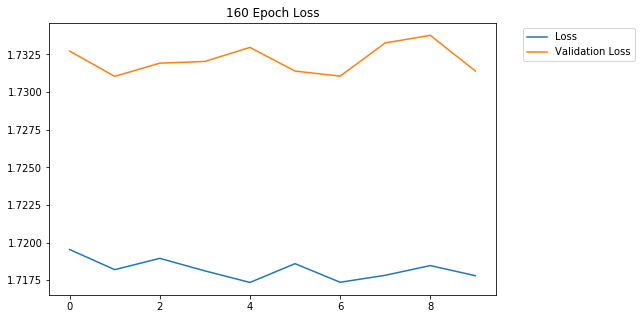

Train on 113919 samples, validate on 28480 samples
Epoch 1/10
113919/113919 [==============================] - 23s 198us/step - loss: 1.7196 - acc: 0.3204 - val_loss: 1.7328 - val_acc: 0.3145
Epoch 2/10
113919/113919 [==============================] - 23s 198us/step - loss: 1.7173 - acc: 0.3221 - val_loss: 1.7309 - val_acc: 0.3141
Epoch 3/10
113919/113919 [==============================] - 23s 198us/step - loss: 1.7179 - acc: 0.3213 - val_loss: 1.7307 - val_acc: 0.3153
Epoch 4/10
113919/113919 [==============================] - 22s 196us/step - loss: 1.7172 - acc: 0.3219 - val_loss: 1.7311 - val_acc: 0.3154
Epoch 5/10
113919/113919 [==============================] - 22s 196us/step - loss: 1.7172 - acc: 0.3217 - val_loss: 1.7309 - val_acc: 0.3140
Epoch 6/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7180 - acc: 0.3217 - val_loss: 1.7317 - val_acc: 0.3150
Epoch 7/10
113919/113919 [==============================] - 22s 195us/step - loss: 1.7177 - acc: 0.3210

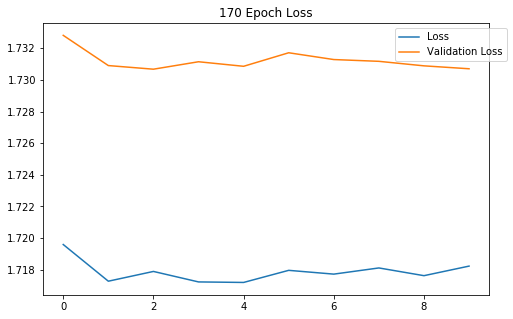

Train on 113919 samples, validate on 28480 samples
Epoch 1/10
113919/113919 [==============================] - 22s 197us/step - loss: 1.7176 - acc: 0.3217 - val_loss: 1.7318 - val_acc: 0.3128
Epoch 2/10
113919/113919 [==============================] - 22s 193us/step - loss: 1.7172 - acc: 0.3216 - val_loss: 1.7314 - val_acc: 0.3145
Epoch 3/10
113919/113919 [==============================] - 23s 200us/step - loss: 1.7174 - acc: 0.3213 - val_loss: 1.7312 - val_acc: 0.3129
Epoch 4/10
113919/113919 [==============================] - 22s 196us/step - loss: 1.7160 - acc: 0.3214 - val_loss: 1.7318 - val_acc: 0.3149
Epoch 5/10
113919/113919 [==============================] - 22s 196us/step - loss: 1.7171 - acc: 0.3213 - val_loss: 1.7305 - val_acc: 0.3123
Epoch 6/10
113919/113919 [==============================] - 22s 196us/step - loss: 1.7173 - acc: 0.3212 - val_loss: 1.7324 - val_acc: 0.3134
Epoch 7/10
113919/113919 [==============================] - 22s 195us/step - loss: 1.7185 - acc: 0.3201

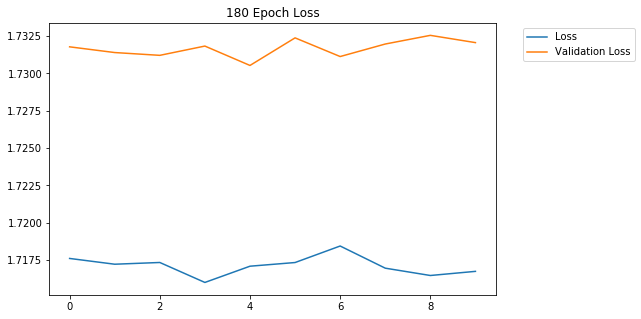

Train on 113919 samples, validate on 28480 samples
Epoch 1/10
113919/113919 [==============================] - 22s 196us/step - loss: 1.7167 - acc: 0.3223 - val_loss: 1.7320 - val_acc: 0.3123
Epoch 2/10
113919/113919 [==============================] - 22s 196us/step - loss: 1.7165 - acc: 0.3216 - val_loss: 1.7309 - val_acc: 0.3132
Epoch 3/10
113919/113919 [==============================] - 22s 196us/step - loss: 1.7163 - acc: 0.3223 - val_loss: 1.7303 - val_acc: 0.3136
Epoch 4/10
113919/113919 [==============================] - 23s 199us/step - loss: 1.7163 - acc: 0.3221 - val_loss: 1.7315 - val_acc: 0.3123
Epoch 5/10
113919/113919 [==============================] - 22s 196us/step - loss: 1.7161 - acc: 0.3211 - val_loss: 1.7311 - val_acc: 0.3140
Epoch 6/10
113919/113919 [==============================] - 22s 196us/step - loss: 1.7173 - acc: 0.3208 - val_loss: 1.7301 - val_acc: 0.3127
Epoch 7/10
 87300/113919 [=====================>........] - ETA: 4s - loss: 1.7190 - acc: 0.3194

In [0]:
for i in range(1, 100):
    stock ='SGMO'
    X = [i['Target'] for i in data_list]
    X = np.array(X)
    y = [i['Low_1'] for i in data_list]
    y = np.array(y).reshape(len(y),7)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train, batch_size=100, epochs=10, validation_data=(X_test, y_test))
    dict_ = model.history.history
    plt.figure(figsize=(8,5))
    plt.title(f"{i*10} Epoch Loss")
    plt.plot(dict_['loss'], label = 'Loss')
    plt.plot(dict_['val_loss'], label= 'Validation Loss')
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.show()
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)
    predict_ = model.predict(X)


    model.save_weights(f'model_conv1d_{i*10}.h5')

In [1]:
for i in range(100, 200):
    stock ='SGMO'
    X = [i['Target'] for i in data_list]
    X = np.array(X)
    y = [i['Low_1'] for i in data_list]
    y = np.array(y).reshape(len(y),7)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train, batch_size=100, epochs=10, validation_data=(X_test, y_test), verbose=0 )
    dict_ = model.history.history
    plt.figure(figsize=(8,5))
    plt.title(f"{i*10} Epoch Loss")
    plt.plot(dict_['loss'], label = 'Loss')
    plt.plot(dict_['val_loss'], label= 'Validation Loss')
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.show()
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)
    predict_ = model.predict(X)


    model.save_weights(f'model_conv1d_{i*10}.h5')

NameError: ignored